Question

Providing a dataset of employees working in ABC company. It consists of 458 rows and 9 columns. 
The company needs the detailed report and explanation of their employees in each team, also need to identify the following:

1.How many are there in each Team and the percentage splitting with respect to the total employees.
2.Segregate the employees w.r.t different positions. 
3.Find from which age group most of the employees belong to. 
4.Find out under which team and position, spending in terms of salary is high. 
5.Find if there is any correlation between age and salary , represent it visually.

Before doing the above questions,perform pre processing of the dataset. 
Also, the column height is having incorrect data, changing the data of that particular column with any random numbers between 150 and 180.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# To load the data set

df = pd.read_csv('ModuleEndProjrct_DATASET.csv')

In [10]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [10]:
df.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,06-Sep,240,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55,PF,21,06-Aug,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,7-0,238,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12,PG,22,06-Feb,190,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36,PG,22,06-Apr,220,Oklahoma State,3431040.0


In [11]:
df.tail(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
448,Gordon Hayward,Utah Jazz,20,SF,26,06-Aug,226,Butler,15409570.0
449,Rodney Hood,Utah Jazz,5,SG,23,06-Aug,206,Duke,1348440.0
450,Joe Ingles,Utah Jazz,2,SF,28,06-Aug,226,NaN,2050000.0
451,Chris Johnson,Utah Jazz,23,SF,26,06-Jun,206,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41,PF,20,06-Oct,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,07-Mar,231,Kansas,947276.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [13]:
df.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [14]:
df.describe(include = 'all')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,458,458,458.000000,458,458.000000,458,458.000000,374,4.470000e+02
unique,458,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,06-Sep,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.713974,NaN,26.934498,NaN,221.543668,NaN,4.833970e+06
std,NaN,NaN,15.966837,NaN,4.400128,NaN,26.343200,NaN,5.226620e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.025210e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.836186e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


In [15]:
df.isnull()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
453,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,True,False
455,False,False,False,False,False,False,False,True,False
456,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [17]:
df.size

4122

In [18]:
df.shape

(458, 9)

In [22]:
import numpy as np
df['Height']=np.random.randint(150,180,size = len(df))

In [23]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,165,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,164,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,178,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,178,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,159,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,174,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,179,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,172,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,167,231,Kansas,947276.0


In [24]:
#To find the number of employees in each team
total_num_employees =df['Team'].value_counts()

In [25]:
total_num_employees.sort_values()

Team
Minnesota Timberwolves    14
Orlando Magic             14
Dallas Mavericks          15
Philadelphia 76ers        15
Toronto Raptors           15
Golden State Warriors     15
Los Angeles Clippers      15
Los Angeles Lakers        15
Phoenix Suns              15
Sacramento Kings          15
Chicago Bulls             15
Cleveland Cavaliers       15
Detroit Pistons           15
Indiana Pacers            15
Boston Celtics            15
Houston Rockets           15
Atlanta Hawks             15
Charlotte Hornets         15
Miami Heat                15
Washington Wizards        15
Denver Nuggets            15
Oklahoma City Thunder     15
Portland Trail Blazers    15
Brooklyn Nets             15
San Antonio Spurs         15
Milwaukee Bucks           16
New York Knicks           16
Utah Jazz                 16
Memphis Grizzlies         18
New Orleans Pelicans      19
Name: count, dtype: int64

In [31]:
#To find the percentage of each team
Percentage =total_num_employees/len(df)*100
Percentage

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

In [32]:
Percentage.size

30

In [35]:
seggrigate_positions = df['Position'].value_counts()
seggrigate_positions

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

In [36]:
seggrigate_positions.size

5

In [38]:
employees=df.groupby('Position')['Name'].apply(list)
for Position, Names in employees.items():
    print(f"Employees in {Position} position: ")
    for name in Names:
        print(name)
    print("\n")    

Employees in C position: 
Kelly Olynyk
Jared Sullinger
Tyler Zeller
Brook Lopez
Henry Sims
Robin Lopez
Kevin Seraphin
Joel Embiid
Jahlil Okafor
Bismack Biyombo
Lucas Nogueira
Jonas Valanciunas
Andrew Bogut
Festus Ezeli
Marreese Speights
Cole Aldrich
DeAndre Jordan
Tarik Black
Roy Hibbert
Robert Sacre
Tyson Chandler
Alex Len
Alan Williams
Willie Cauley-Stein
DeMarcus Cousins
Kosta Koufos
Pau Gasol
Joakim Noah
Sasha Kaun
Timofey Mozgov
Tristan Thompson
Joel Anthony
Aron Baynes
Andre Drummond
Jordan Hill
Ian Mahinmi
Greg Monroe
Miles Plumlee
JaVale McGee
Salah Mejri
Zaza Pachulia
Dwight Howard
Josh Smith
Marc Gasol
Alexis Ajinca
Omer Asik
Kendrick Perkins
Matt Bonner
Boris Diaw
Tim Duncan
Boban Marjanovic
Al Horford
Tiago Splitter
Walter Tavares
Al Jefferson
Frank Kaminsky III
Cody Zeller
Hassan Whiteside
Dewayne Dedmon
Nikola Vucevic
Marcin Gortat
JJ Hickson
Nene Hilario
Nikola Jokic
Joffrey Lauvergne
Jusuf Nurkic
Gorgui Dieng
Nikola Pekovic
Karl-Anthony Towns
Steven Adams
Enes Kanter
Na

In [39]:
#Find from which age group most of the employees belong to.

df['Age'].value_counts()

Age
24    47
25    46
27    41
23    41
26    36
28    31
30    31
29    28
22    26
31    22
20    19
21    19
33    14
32    13
34    10
36    10
35     9
37     4
38     4
40     3
39     2
19     2
Name: count, dtype: int64

In [11]:
import pandas as pd
age_group=pd.cut(df['Age'], bins=[15,20,25,30,35,40,45,50,55,60])
age_group

0      (20, 25]
1      (20, 25]
2      (25, 30]
3      (20, 25]
4      (25, 30]
         ...   
453    (25, 30]
454    (20, 25]
455    (25, 30]
456    (25, 30]
457    (20, 25]
Name: Age, Length: 458, dtype: category
Categories (9, interval[int64, right]): [(15, 20] < (20, 25] < (25, 30] < (30, 35] ... (40, 45] < (45, 50] < (50, 55] < (55, 60]]

In [12]:
import numpy as np
a_grp = age_group.value_counts()
a_grp

Age
(20, 25]    179
(25, 30]    167
(30, 35]     68
(35, 40]     23
(15, 20]     21
(40, 45]      0
(45, 50]      0
(50, 55]      0
(55, 60]      0
Name: count, dtype: int64

In [17]:
agegroup = a_grp.idxmax()
print("maximum number of employees is from the age group ",agegroup)

maximum number of employees is from the age group  (20, 25]


### 4. Find the team and position with the highest spending


In [28]:
Highest_Salary=df.groupby(['Team', 'Position'])['Salary'].sum().idxmax()
Highest_Salary

('Los Angeles Lakers', 'SF')

In [34]:
Highest_Salary=pd.DataFrame(df.groupby(["Team","Position"],as_index=False)['Salary'].sum().sort_values(by="Salary",ascending=False))
Highest_Salary

,Team,Position,Salary
67,Los Angeles Lakers,SF,31866445.0
75,Miami Heat,PF,31538671.0
53,Houston Rockets,SG,28122883.0
116,Phoenix Suns,PG,28002998.0
37,Denver Nuggets,SF,27982771.0
...,...,...,...
38,Denver Nuggets,SG,2790245.0
112,Philadelphia 76ers,SF,1845059.0
125,Sacramento Kings,PF,1370152.0
74,Miami Heat,C,981348.0


In [36]:
Highest_Salary["Salary"].max()

31866445.0

### 5.Find if there is any correlation between age and salary , represent it visually.

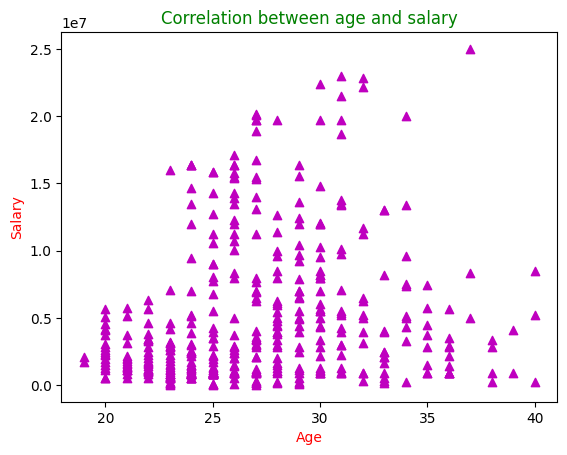

In [44]:
import matplotlib.pyplot as plt

plt.scatter(df["Age"],df["Salary"],color = 'm',marker ='^')
plt.xlabel('Age',color ='r')
plt.ylabel('Salary',color ='r')
plt.title('Correlation between age and salary',color ='g')
plt.show()

In [45]:
correlation=df[['Age','Salary']].corr()
correlation        

,Age,Salary
Age,1.000000,0.214009
Salary,0.214009,1.000000


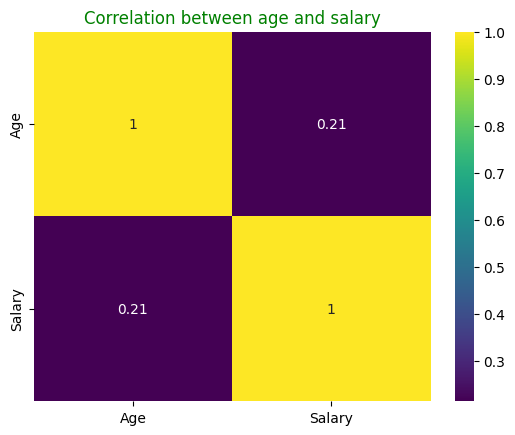

In [51]:
import seaborn as sns
sns.heatmap(correlation,annot=True,cmap='viridis')
plt.title('Correlation between age and salary',color ='g')
plt.show()